In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.impute import SimpleImputer

In [2]:
# 2. Load and examine the data
df = pd.read_csv("data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

In [64]:
# 3. Initial EDA
print("Dataset Shape:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nClass Distribution:\n", df["Bankrupt?"].value_counts())
print(
    "\nClass Distribution Percentage:\n", df["Bankrupt?"].value_counts(normalize=True)
)

Dataset Shape: (6819, 96)

Missing Values:
 Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

Class Distribution:
 Bankrupt?
0    6599
1     220
Name: count, dtype: int64

Class Distribution Percentage:
 Bankrupt?
0    0.967737
1    0.032263
Name: proportion, dtype: float64


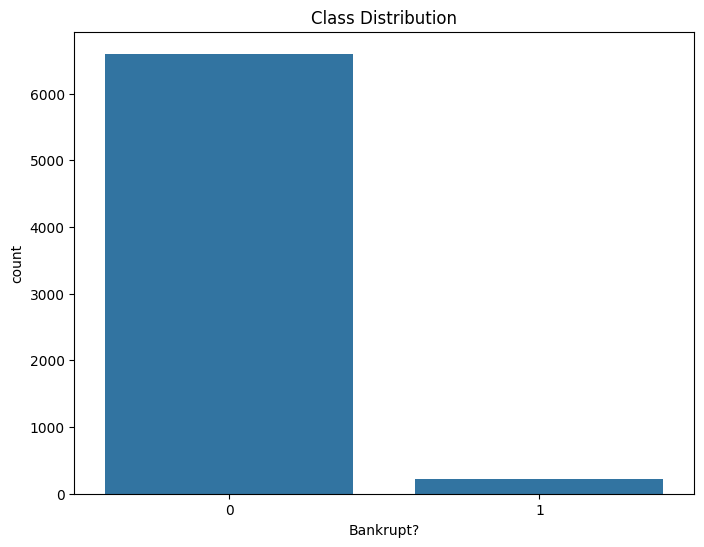

In [65]:
# 4. Visualize class distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="Bankrupt?")
plt.title("Class Distribution")
plt.show()

In [66]:
# 6. Split features and target
X = df.drop("Bankrupt?", axis=1)
y = df["Bankrupt?"]

In [67]:
# 7. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [68]:
# 8. Handle class imbalance by dropping 85% of class 0 samples from training set
print("Original training set shape:", X_train.shape)    
print("Original training set class distribution:", y_train.value_counts())

class_0_indices = y_train[y_train == 0].index
drop_indices = np.random.choice(class_0_indices, size=int(len(class_0_indices) * 0.85), replace=False)
X_train = X_train.drop(drop_indices)
y_train = y_train.drop(drop_indices)

print("Processed training set shape:", X_train.shape)
print("Processed training set class distribution:", y_train.value_counts())





Original training set shape: (5455, 95)
Original training set class distribution: Bankrupt?
0    5286
1     169
Name: count, dtype: int64
Processed training set shape: (962, 95)
Processed training set class distribution: Bankrupt?
0    793
1    169
Name: count, dtype: int64


In [69]:
# 10. Train multiple models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
}


Training Logistic Regression...
Cross-validation scores: [0.79792746 0.8134715  0.828125   0.81770833 0.8125    ]
Average CV score: 0.814 (+/- 0.019)

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1313
           1       0.06      0.04      0.05        51

    accuracy                           0.94      1364
   macro avg       0.51      0.51      0.51      1364
weighted avg       0.93      0.94      0.93      1364


Training Decision Tree...


/Users/alexng/raid/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/alexng/raid/.venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Cross-validation scores: [0.89119171 0.84455959 0.82291667 0.90104167 0.875     ]
Average CV score: 0.867 (+/- 0.058)

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94      1313
           1       0.20      0.61      0.31        51

    accuracy                           0.90      1364
   macro avg       0.59      0.76      0.62      1364
weighted avg       0.95      0.90      0.92      1364


Training Random Forest...
Cross-validation scores: [0.94818653 0.9015544  0.91145833 0.91145833 0.90625   ]
Average CV score: 0.916 (+/- 0.033)

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97      1313
           1       0.35      0.69      0.47        51

    accuracy                           0.94      1364
   macro avg       0.67      0.82      0.72      1364
weighted avg       0.96      0.94      0.95      1364


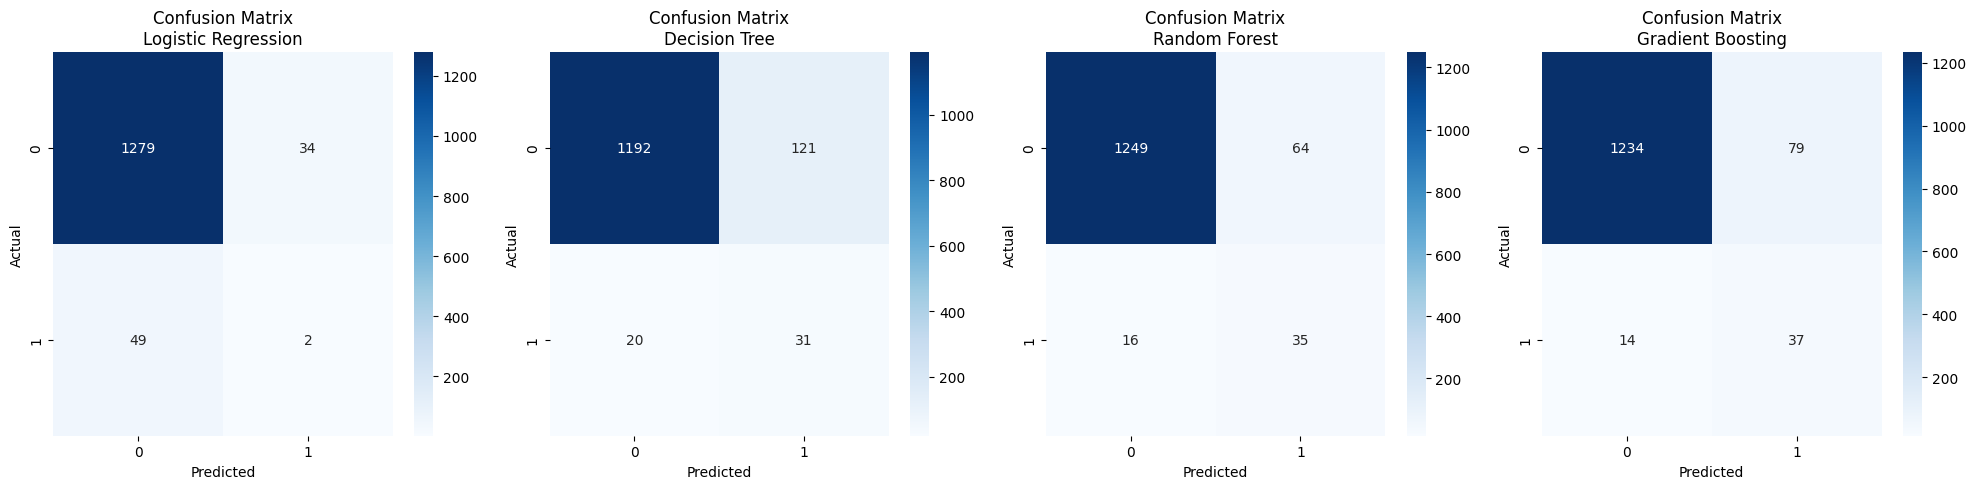

In [70]:
# 11. Train and evaluate each model
results = {}
plt.figure(figsize=(20, 5))
for i, (name, model) in enumerate(models.items(), 1):
    print(f"\nTraining {name}...")

    # Cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    # Train model
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"\nClassification Report for {name}:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.subplot(1, 4, i)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix\n{name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')

    results[name] = model.score(X_test, y_test)

plt.tight_layout()
plt.show()

In [71]:
# 12. Feature Importance Analysis using Random Forest
rf_model = models["Random Forest"]
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

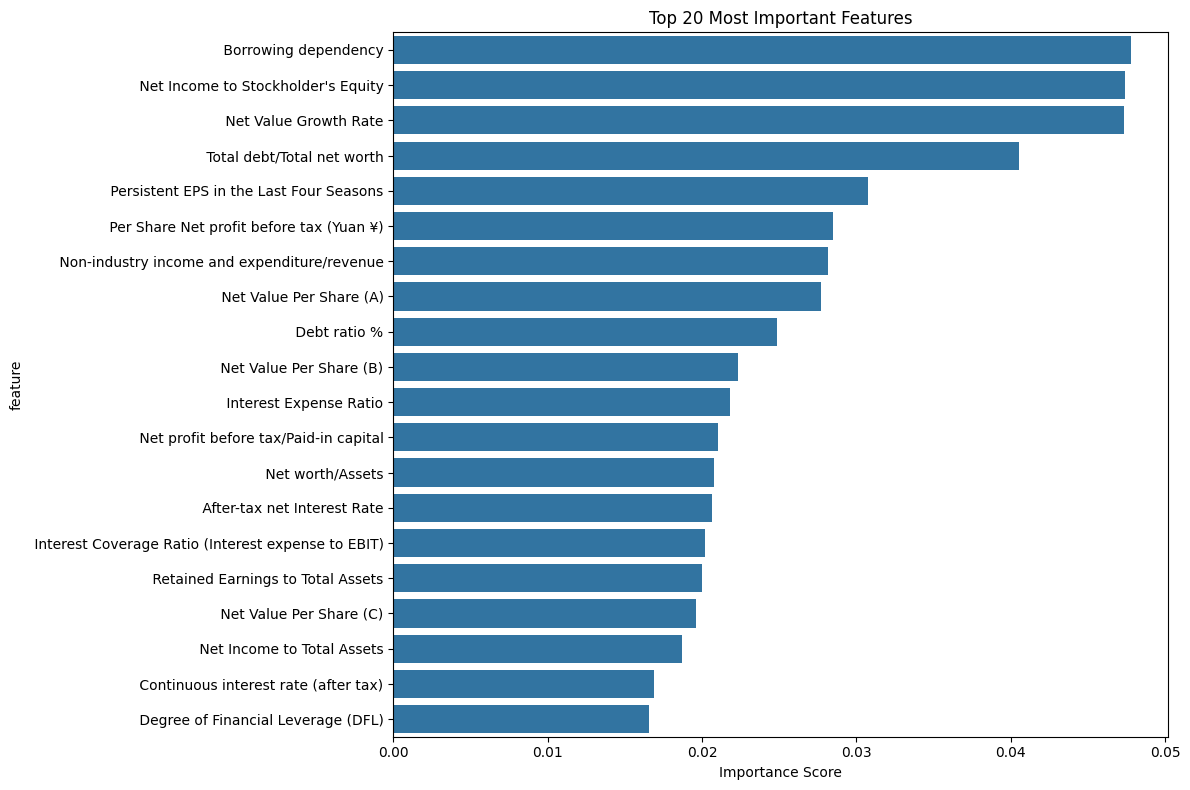

In [72]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance.head(20), x="importance", y="feature")
plt.title("Top 20 Most Important Features")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

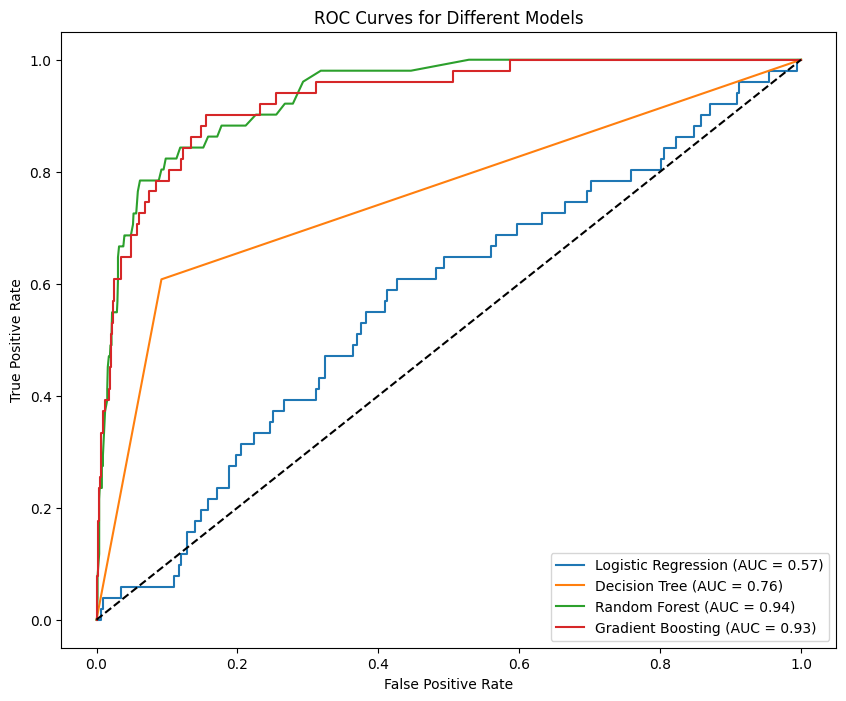

In [73]:
# 14. ROC Curves
plt.figure(figsize=(10, 8))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Different Models")
plt.legend()
plt.show()

In [74]:
# 15. Hyperparameter tuning for best model
# Assuming Decision Tree performed best
param_grid = {
    "max_depth": [3, 5, 7, 10], # Reduced max depths to prevent overfitting
    "min_samples_split": [5, 10, 20], # Increased min samples to split
    "min_samples_leaf": [5, 10, 15], # Increased min samples per leaf
    "criterion": ["gini", "entropy"],
    "ccp_alpha": [0.001, 0.01, 0.1] # Added cost-complexity pruning parameter
}

grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42), 
    param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("\nBest parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)


Best parameters: {'ccp_alpha': 0.001, 'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 10, 'min_samples_split': 5}
Best cross-validation score: 0.7217816230072899



Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95      1313
           1       0.26      0.80      0.39        51

    accuracy                           0.91      1364
   macro avg       0.62      0.86      0.67      1364
weighted avg       0.96      0.91      0.93      1364


Accuracy for each class:
Class 0: 0.910
Class 1: 0.804


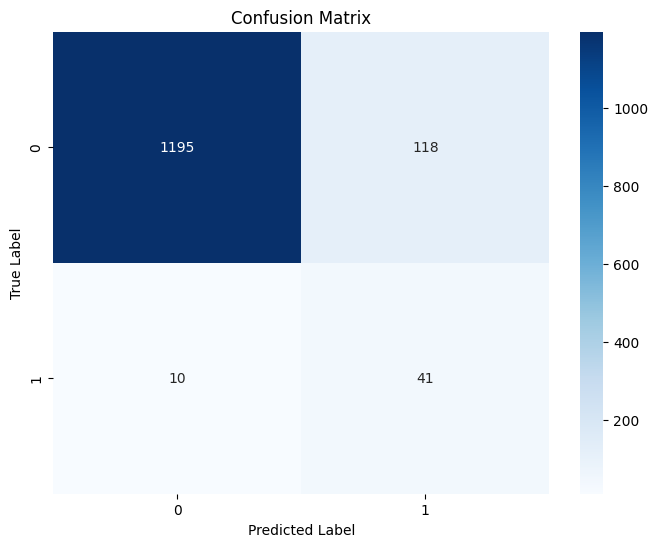

In [75]:
# 16. Final model evaluation with best parameters

from sklearn.metrics import accuracy_score

best_model = grid_search.best_estimator_
y_pred_final = best_model.predict(X_test)
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_final))
# Print accuracy for each class
print("\nAccuracy for each class:")
for class_label in [0, 1]:
    mask = y_test == class_label
    class_accuracy = accuracy_score(y_test[mask], y_pred_final[mask])
    print(f"Class {class_label}: {class_accuracy:.3f}")



# Plot confusion matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_final)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


Key Findings:
1. Best performing model: Random Forest

2. Top 10 most important features:
                                         feature  importance
39                          Borrowing dependency    0.047787
89            Net Income to Stockholder's Equity    0.047415
29                         Net Value Growth Rate    0.047348
35                    Total debt/Total net worth    0.040522
18       Persistent EPS in the Last Four Seasons    0.030720
22      Per Share Net profit before tax (Yuan ¥)    0.028457
8    Non-industry income and expenditure/revenue    0.028137
16                       Net Value Per Share (A)    0.027713
36                                  Debt ratio %    0.024864
15                       Net Value Per Share (B)    0.022333

3. Model comparison:
Logistic Regression: 0.939
Decision Tree: 0.897
Random Forest: 0.941
Gradient Boosting: 0.932

4. Decision Tree Visualization:


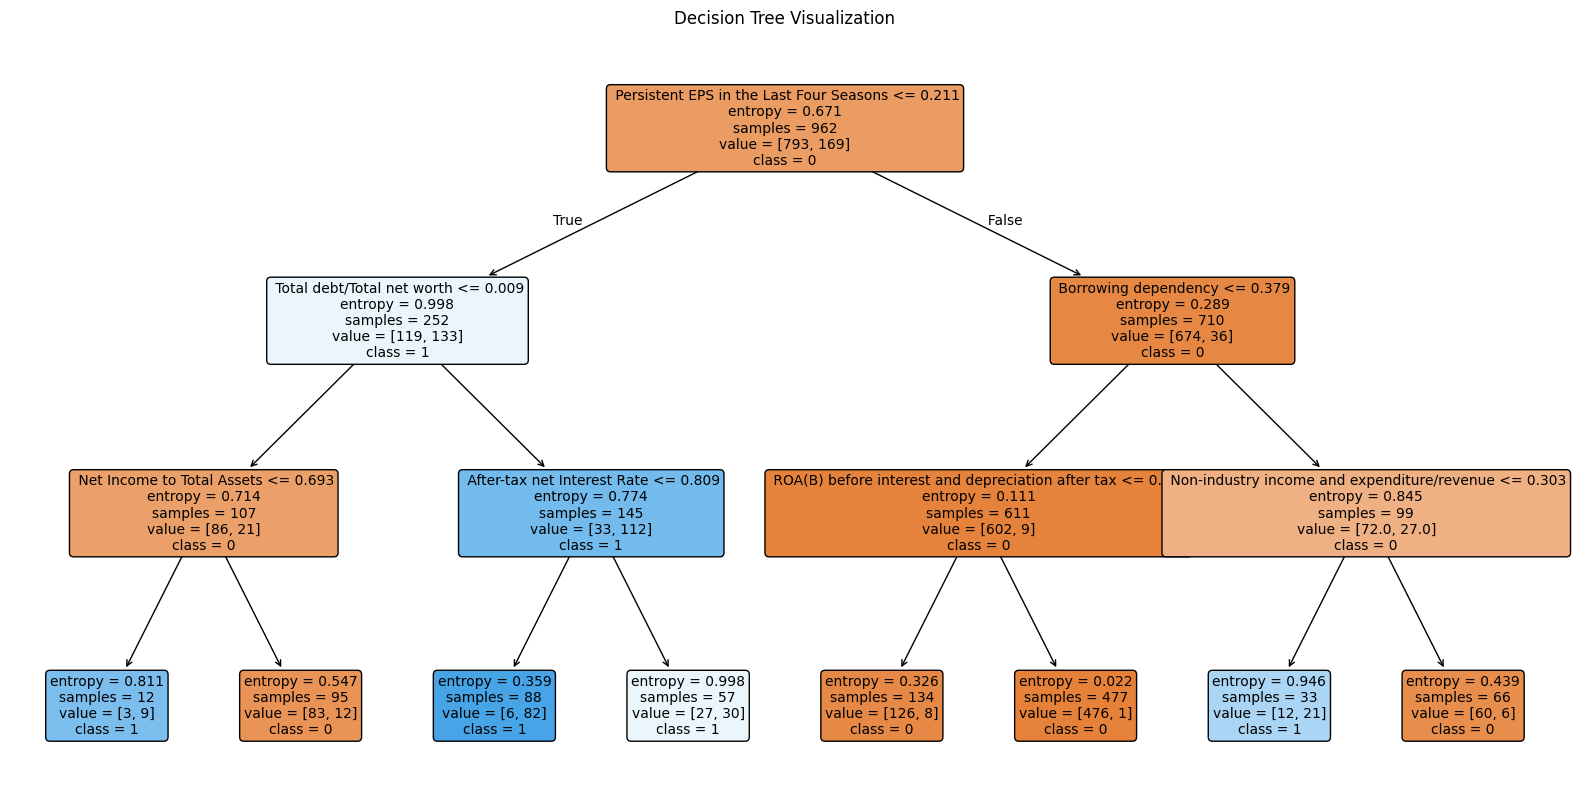

In [76]:
# 17. Save important findings
from sklearn.tree import plot_tree
print("\nKey Findings:")
print("1. Best performing model:", max(results, key=results.get))
print("\n2. Top 10 most important features:")
print(feature_importance.head(10).to_string())
print("\n3. Model comparison:")
for model, score in results.items():
    print(f"{model}: {score:.3f}")
    
print("\n4. Decision Tree Visualization:")
plt.figure(figsize=(20, 10))
plot_tree(best_model, feature_names=X.columns, class_names=['0', '1'], 
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()
